<a href="https://colab.research.google.com/github/shahin-ro/CIFAR-10-Image-Detection/blob/main/CIFAR_10_Image_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [26]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.datasets.cifar10 as cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import random
from google.colab import files
import cv2

# **Data Preparation**

In [27]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)

Train shape: (50000, 32, 32, 3) (50000, 10)
Test shape: (10000, 32, 32, 3) (10000, 10)


# **Define the Model**

In [24]:
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),

    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation="softmax")
])

model.summary()

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,602 (260.16 KB)

 Trainable params: 66,410 (259.41 KB)

 Non-trainable params: 192 (768.00 B)

# **Train the Model**

In [28]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=30,
    batch_size=64
)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9036 - loss: 0.2850 - val_accuracy: 0.6873 - val_loss: 1.1351
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9125 - loss: 0.2655 - val_accuracy: 0.6987 - val_loss: 1.0860
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9189 - loss: 0.2451 - val_accuracy: 0.7044 - val_loss: 1.1197
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9227 - loss: 0.2304 - val_accuracy: 0.7062 - val_loss: 1.1471
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9272 - loss: 0.2159 - val_accuracy: 0.7287 - val_loss: 1.0394
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9330 - loss: 0.1983 - val_accuracy: 0.7345 - val_loss: 1.0832
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9387 - loss: 0.1841 - val_accuracy: 0.7075 - val_loss: 1.2167
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9426 - loss: 0.1723 - val_accuracy: 0.

# **ROC Curve for Each Class**

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


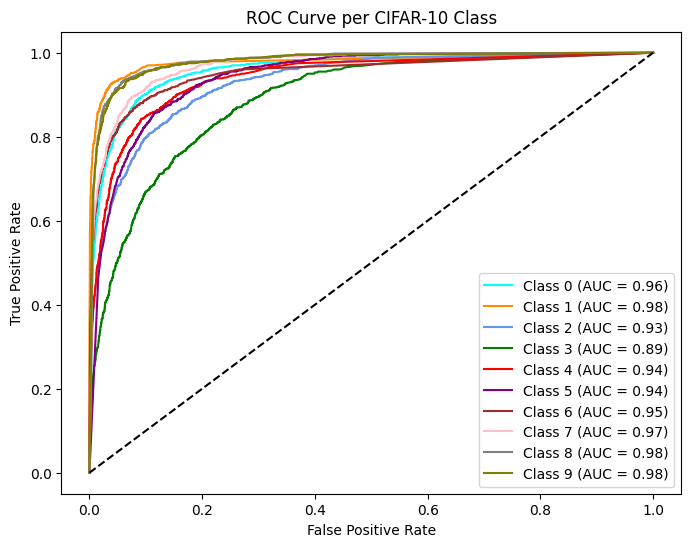

In [29]:
y_pred_proba = model.predict(x_test)

n_classes = y_test.shape[1]
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
colors = cycle(['aqua','darkorange','cornflowerblue','green','red','purple','brown','pink','gray','olive'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve per CIFAR-10 Class")
plt.legend(loc="lower right")
plt.show()

# **CIFAR-10 class names**

In [33]:
cifar10_labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

for i, label in enumerate(cifar10_labels):
    print(f"Class {i}: {label}")


Class 0: airplane
Class 1: automobile
Class 2: bird
Class 3: cat
Class 4: deer
Class 5: dog
Class 6: frog
Class 7: horse
Class 8: ship
Class 9: truck


# **Test on Random Test Images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


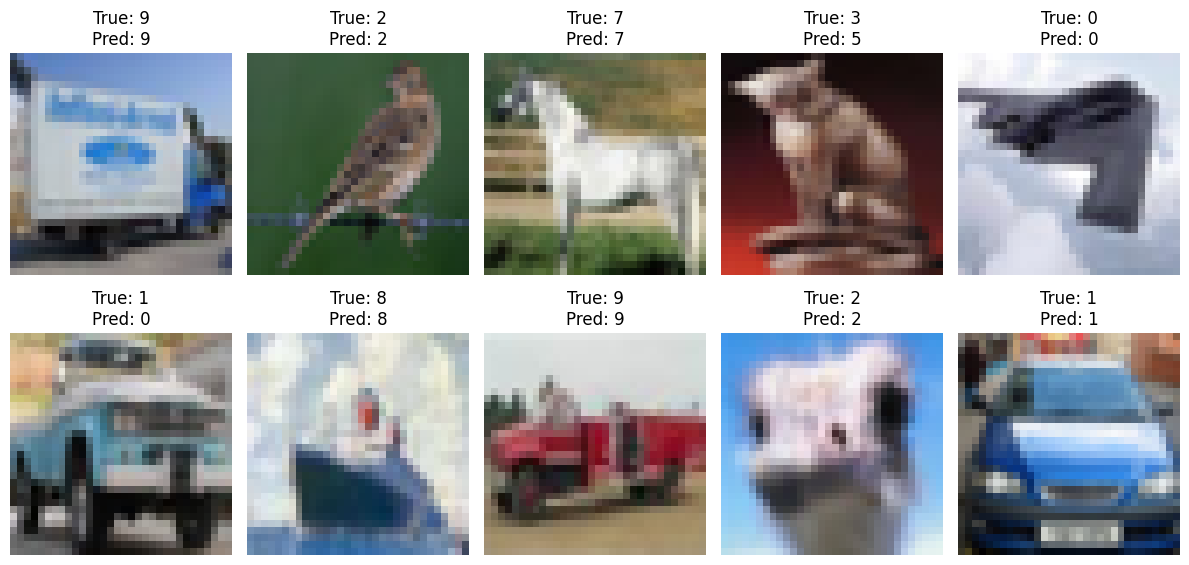

In [30]:
indices = random.sample(range(len(x_test)), 10)
samples = x_test[indices]
labels = np.argmax(y_test[indices], axis=1)

predictions = model.predict(samples)

plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(samples[i])
    plt.title(f"True: {labels[i]}\nPred: {np.argmax(predictions[i])}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# **Test on Uploaded Images**

Saving imagess.jpg to imagess (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


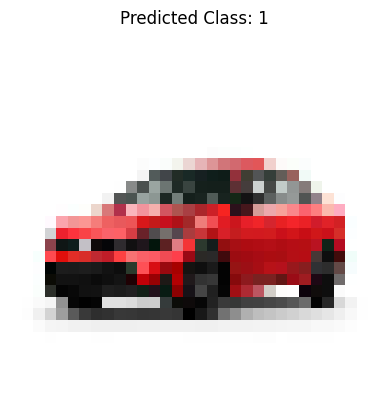

In [35]:
uploaded = files.upload()

for filename in uploaded.keys():
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (32, 32))
    img_normalized = img_resized.astype("float32") / 255.0
    input_img = np.expand_dims(img_normalized, axis=0)

    predict = model.predict(input_img)
    pred_class = np.argmax(predict)

    plt.imshow(img_resized)
    plt.title(f"Predicted Class: {pred_class}")
    plt.axis("off")
    plt.show()